4. Genere aleatoriamente una población de 50 matrices de 120 por 180, con números de 0 a 255,
preséntelas como una gráfica RGB. La función de aptitud es una imagen cualquiera. Evolucione la
población inicial hasta llegar a la imagen.

In [23]:
import math
from google.colab.patches import cv2_imshow
import random
import numpy as np
import cv2
from PIL import Image


mejor_gen = 0
mejor_crom = []
mejor_aptitud = 0


##decodifica un cromosoma
def evalua(crom, original):
  crom2 = np.array(crom, dtype=np.int16)
  original2 = np.array(original, dtype=np.int16)
  aptitud =  200 - np.mean(abs((crom2.astype(np.int16) - original2.astype(np.int16))))
  if aptitud < 0:
    aptitud = 0
  return aptitud

def generar_cromosoma(alto, ancho):
    return np.random.randint(0, 256, (alto, ancho), dtype=np.uint8)## Matrices aleatorias

In [24]:
def next_generation(poblacion, N, original):
    """
    Genera la siguiente generación de cromosomas.
    Cada cromosoma es una matriz 2D de mismo tamaño.
    """
    prob_mutacion = 0.1 / 100

    # Convertir a arrays si son listas
    poblacion = [np.array(x, dtype=np.int16) for x in poblacion]

    # Obtener dimensiones de los cromosomas
    alto, ancho = poblacion[0].shape

    # Evaluar aptitud y normalizar
    aptitud = [evalua(x, original) for x in poblacion]
    aptitud = [x / sum(aptitud) for x in aptitud]
    aptitud[aptitud.index(max(aptitud))] = 1
    # Selección por ruleta
    new_generation = []
    while len(new_generation) < N:
        for i in range(len(poblacion)):
            if random.random() <= aptitud[i] and len(new_generation) < N:
                # Copia profunda para evitar referencias
                new_generation.append(np.copy(poblacion[i]))

    np.random.shuffle(new_generation)
    # Cruce: siempre pares
    sons_generation = []
    for i in range(0, N - 1, 2):
        parent1 = new_generation[i]
        parent2 = new_generation[i + 1]

        parent1 = np.array(parent1, dtype=np.int16)
        parent2 = np.array(parent2, dtype=np.int16)
        original2 = np.array(original, dtype=np.int16)


        apt_parent1 = abs((parent1.astype(np.int16) - original2.astype(np.int16)))
        apt_parent2 = abs((parent2.astype(np.int16) - original2.astype(np.int16)))

        son_1 = parent1.copy()
        son_2 = parent2.copy()

        for j in range(alto):
            for k in range(ancho):
                if apt_parent1[j,k] <= apt_parent2[j,k]:
                    son_1[j, k] = parent1[j, k]
                    son_2[j, k] = parent2[j, k]
                else:
                    son_1[j, k] = parent2[j, k]
                    son_2[j, k] = parent1[j, k]


        sons_generation.append(son_1)
        sons_generation.append(son_2)

    # Mutación
    for i in range(len(sons_generation)):
        for j in range(alto):
            for k in range(ancho):
                if random.random() < prob_mutacion:
                    sons_generation[i][j, k] = random.randint(0, 255)

    return sons_generation

In [25]:
def search_best_crom(poblacion, Gen, original):
  global mejor_crom
  global mejor_gen
  global mejor_aptitud


  for crom in poblacion:
    Aptitud = evalua(crom, original)
    if Aptitud >= mejor_aptitud:
      mejor_crom = crom
      mejor_aptitud = Aptitud
      mejor_gen = Gen+1

  print(f"\nGeneracion actual:{Gen+1}")
  print(f"=== Mejor cromosoma total: de la generacion {mejor_gen} ===")
  print(f"Precision = {mejor_aptitud / 2}%")

La funcion de carga de imagenes abre un directorio para cargar la imagen

In [26]:
def cargar_imagen(alto, ancho):
    try:
        # Detectar Colab
        import google.colab
        from google.colab import files
        print("Entorno: Google Colab")
        uploaded = files.upload()  # Selector de archivos
        nombre_archivo = list(uploaded.keys())[0]
        img = Image.open(nombre_archivo).convert('L')
    except ImportError:
        # JupyterLab u otro entorno
        print("Entorno: JupyterLab o local")
        from ipywidgets import FileUpload
        upload = FileUpload(accept='image/*', multiple=False)
        display(upload)
        print("Sube la imagen usando el widget")
        # Esperar a que el usuario suba la imagen
        while not upload.value:
            pass
        file_info = list(upload.value.values())[0]
        img = Image.open(file_info['content']).convert('L')

    img = img.resize((alto,ancho), Image.Resampling.LANCZOS)
    img_array = np.array(img)

    return img_array

Entorno: Google Colab


Saving PRUEBA.png to PRUEBA (3).png

Generacion actual:1
=== Mejor cromosoma total: de la generacion 1 ===
Precision = 65.42189814814814%

Generacion actual:2
=== Mejor cromosoma total: de la generacion 2 ===
Precision = 78.09583333333333%

Generacion actual:3
=== Mejor cromosoma total: de la generacion 3 ===
Precision = 87.14652777777778%

Generacion actual:4
=== Mejor cromosoma total: de la generacion 4 ===
Precision = 91.95858796296297%

Generacion actual:5
=== Mejor cromosoma total: de la generacion 5 ===
Precision = 92.8337037037037%

Generacion actual:6
=== Mejor cromosoma total: de la generacion 6 ===
Precision = 92.8407175925926%

Generacion actual:7
=== Mejor cromosoma total: de la generacion 6 ===
Precision = 92.8407175925926%

Generacion actual:8
=== Mejor cromosoma total: de la generacion 8 ===
Precision = 92.84282407407407%

Generacion actual:9
=== Mejor cromosoma total: de la generacion 9 ===
Precision = 92.84349537037038%

Generacion actual:10
=== Mejor cromosoma total: 

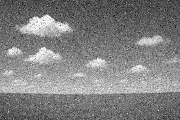



Imagen Original




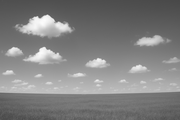



Precision = 93.16942129629629%


In [27]:
##No olvidar colocar la imagen en el mismo directorio
def Ag_imagenes(alto = 120, ancho = 180,N = 100, Gen = 100):
  global mejor_crom
  global mejor_gen
  global mejor_aptitud
  original = cargar_imagen(ancho, alto)

  poblacion = [generar_cromosoma(alto, ancho) for _ in range(N)] ##diseñamos la poblacion original

  for generacion in range (Gen):
    search_best_crom(poblacion,generacion, original)
    poblacion = next_generation(poblacion,N,original)

  print('\n\n Resultados finales\n\nImagen Reconstruida')

  ##resultados finales
  cv2.imwrite("salida.png", mejor_crom)
  cv2_imshow(mejor_crom)
  print("\n\nImagen Original\n\n")
  # Mostrar la imagen
  cv2.imwrite("salida2.png", original)
# Mostrar imágenes en ventanas separadas
  cv2_imshow(original)
  print(f"\n\nPrecision = {mejor_aptitud / 2}%")
Ag_imagenes()


Ejecutando el algoritmo genetico con 100 generaciones y una poblacion de 100 cromosomas. Obtenemos una imagen que se parece a la original con una presicion del 90%, por lo que esto nos asegura que, en un tiempo prudencial de computo y aumentando la probabilidad de mutacion, podemos obtener una fidelidad mucho mas cercana a la imagen esperada originalmente.

Esto nos muestra cuanto alcance tienen los algoritmos geneticos para poder alcanzar un punto de optimizacion maximo.